# PS5 - SVM

## 1. Convert the default dataset format as a DataFrame.

In [126]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action="ignore")
warnings.filterwarnings("ignore")

from sklearn import datasets

In [127]:
# save the dictionary dataset into a variable
cancer_dataset = datasets.load_breast_cancer()
cancer_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

#### Convert the dataset into a dataframe

In [128]:
cancer = pd.concat(
    [pd.DataFrame(data=np.c_[cancer_dataset['data']], columns=cancer_dataset['feature_names']), 
     pd.DataFrame(data=cancer_dataset.target, columns=['benign'])],
    axis=1
)

In [129]:
# add 'malignant' column
cancer['malignant'] = [1 if i == 0 else 0 for i in cancer['benign']]

In [130]:
cancer.drop('benign', axis=1, inplace=True)

In [131]:
pd.set_option('display.max_columns', None)
cancer.sample(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,malignant
153,11.150,13.08,70.87,381.9,0.09754,0.05113,0.01982,0.01786,0.1830,0.06105,0.2251,0.7815,1.429,15.48,0.009019,0.008985,0.011960,0.008232,0.02388,0.001619,11.99,16.30,76.25,440.8,0.1341,0.08971,0.07116,0.05506,0.2859,0.06772,0
439,14.020,15.66,89.59,606.5,0.07966,0.05581,0.02087,0.02652,0.1589,0.05586,0.2142,0.6549,1.606,19.25,0.004837,0.009238,0.009213,0.010760,0.01171,0.002104,14.91,19.31,96.53,688.9,0.1034,0.10170,0.06260,0.08216,0.2136,0.06710,0
288,11.260,19.96,73.72,394.1,0.08020,0.11810,0.09274,0.05588,0.2595,0.06233,0.4866,1.9050,2.877,34.68,0.015740,0.082620,0.080990,0.034870,0.03418,0.006517,11.86,22.33,78.27,437.6,0.1028,0.18430,0.15460,0.09314,0.2955,0.07009,0
258,15.660,23.20,110.20,773.5,0.11090,0.31140,0.31760,0.13770,0.2495,0.08104,1.2920,2.4540,10.120,138.50,0.012360,0.059950,0.082320,0.030240,0.02337,0.006042,19.85,31.64,143.70,1226.0,0.1504,0.51720,0.61810,0.24620,0.3277,0.10190,1
160,11.750,20.18,76.10,419.8,0.10890,0.11410,0.06843,0.03738,0.1993,0.06453,0.5018,1.6930,3.926,38.34,0.009433,0.024050,0.041670,0.011520,0.03397,0.005061,13.32,26.21,88.91,543.9,0.1358,0.18920,0.19560,0.07909,0.3168,0.07987,0
91,15.370,22.76,100.20,728.2,0.09200,0.10360,0.11220,0.07483,0.1717,0.06097,0.3129,0.8413,2.075,29.44,0.009882,0.024440,0.045310,0.017630,0.02471,0.002142,16.43,25.84,107.50,830.9,0.1257,0.19970,0.28460,0.14760,0.2556,0.06828,1
140,9.738,11.97,61.24,288.5,0.09250,0.04102,0.00000,0.00000,0.1903,0.06422,0.1988,0.4960,1.218,12.26,0.006040,0.005656,0.000000,0.000000,0.02277,0.003220,10.62,14.10,66.53,342.9,0.1234,0.07204,0.00000,0.00000,0.3105,0.08151,0
505,9.676,13.14,64.12,272.5,0.12550,0.22040,0.11880,0.07038,0.2057,0.09575,0.2744,1.3900,1.787,17.67,0.021770,0.048880,0.051890,0.014500,0.02632,0.011480,10.60,18.04,69.47,328.1,0.2006,0.36630,0.29130,0.10750,0.2848,0.13640,0
484,15.730,11.28,102.80,747.2,0.10430,0.12990,0.11910,0.06211,0.1784,0.06259,0.1630,0.3871,1.143,13.87,0.006034,0.018200,0.033360,0.010670,0.01175,0.002256,17.01,14.20,112.50,854.3,0.1541,0.29790,0.40040,0.14520,0.2557,0.08181,0
102,12.180,20.52,77.22,458.7,0.08013,0.04038,0.02383,0.01770,0.1739,0.05677,0.1924,1.5710,1.183,14.68,0.005080,0.006098,0.010690,0.006797,0.01447,0.001532,13.34,32.84,84.58,547.8,0.1123,0.08862,0.11450,0.07431,0.2694,0.06878,0


In [132]:
cancer.malignant.value_counts()

0    357
1    212
Name: malignant, dtype: int64

## 2. Present a pairplot of the attributes 'mean radius', 'mean texture', 'mean perimeter','mean area','mean smoothness' and discuss the results.

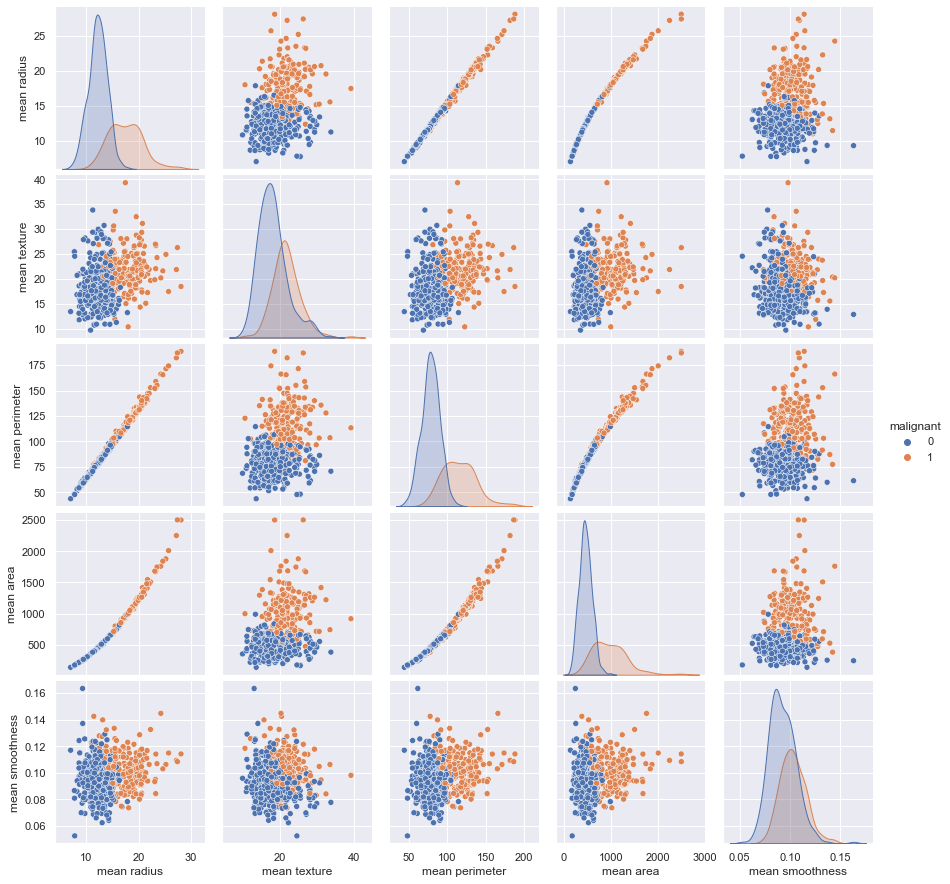

In [133]:
df2 = cancer[['mean radius','mean texture','mean perimeter','mean area','mean smoothness','malignant']]
sns.pairplot(data=df2, hue='malignant')

**Discussion:** Using the `malignant` column as `hue` for the pairplot, it can be cleary seen where the benign and the malignant cases are clustered together. It can be seen also that the breast mass measurements for the benign cases are normally distributed, whereas the breast mass measurements for malignant cases are not normally distributed and the means are greater than the means of benign breast mass measurements. Also, `mean radius`, `mean perimeter` and `mean area` are directly proportional either linearly or non linearly. This is probably because one variable is a function of another. In other words, one variable can be expressed in terms of the other variable/s.

## 3. Show a correlation matrix of the all of the attributes of the dataset. What does the correlation matrix tell us? Use this to build the SVM model X features.

<AxesSubplot:>

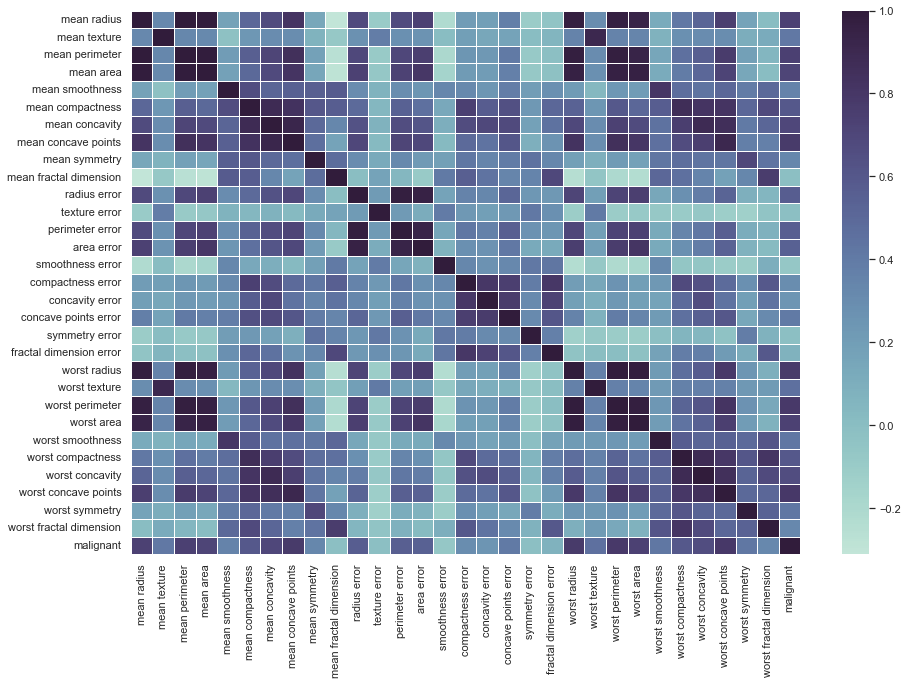

In [134]:
cancer_2 = cancer.copy()
# cancer_2.drop(['mean area','mean perimeter','worst area','worst perimeter','perimeter error','area error'],axis=1,inplace=True)
corr_matrix = cancer_2.corr()
sns.set(rc={'figure.figsize':(15,10)})
custom_cmap = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)
sns.heatmap(corr_matrix, annot=False, cmap=custom_cmap, linecolor='white',linewidth='0.5')

Some of the variables are highly correlated with each other such as `mean radius`, `mean perimeter`, `mean area`, `worst radius`, `radius error` etc. This might cause problem in building our ML models.

## 4. Build an SVM to classify whether the reading is malignant or benign.

In [135]:
cancer_2.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,malignant
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


#### Train/Test Split

In [136]:
X = cancer_2.iloc[:, :-1].values
y = cancer_2.iloc[:, -1].values

In [137]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#### Feature Scaling

In [138]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Train SVM Model Using Linear Kernel

In [139]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

## 5. Present an analysis of the data following the SVM results with cross-validation used.
 - What is the accuracy?
 - Present a confusion matrix and discuss the findings

#### Test Model

In [140]:
y_pred = classifier.predict(X_test)
np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)[0:10,:]

array([[1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0]], dtype=int64)

#### Evaluate Model

In [141]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

accuracy = cross_val_score(classifier, X_test, y_test, cv=5)
acc = accuracy.mean()

f1_score = cross_val_score(classifier, X_test, y_test, cv=5, scoring='f1')
f1 = f1_score.mean()

precision_score = cross_val_score(classifier, X_test, y_test, cv=5, scoring='precision')
precision = precision_score.mean()

recall_score = cross_val_score(classifier, X_test, y_test, cv=5, scoring='recall')
recall = recall_score.mean()

print("Accuracy:", round(acc*100, 2),'%')
print("F1 Score:", round(f1*100, 2),'%')
print("Precision Score:", round(precision*100, 2),'%')
print("Recall Score:", round(recall*100, 2),'%')

Accuracy: 96.48 %
F1 Score: 95.02 %
Precision Score: 95.96 %
Recall Score: 94.18 %


#### Confusion Matrix

[Text(0, 0.5, 'benign'), Text(0, 1.5, 'malignant')]

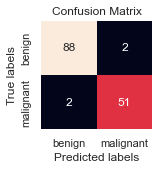

In [142]:
cm = confusion_matrix(y_test, y_pred)
sns.set(rc={'figure.figsize':(2,2)})
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cbar=False)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['benign', 'malignant'])
ax.yaxis.set_ticklabels(['benign', 'malignant'])

The prediction errors (false positives and false negatives) are low. The overall `accuracy` is <ins>96.48%</ins> which is excellent. The confusion matrix shows that the model was able to predict 51 out of 53 total positive (malignant) cases. This is equialent to a `sensitivity` rate of <ins>96.22%</ins>. The model's `specificity` or its ability to predict negative cases is <ins>97.78%</ins>. All the metrics are showing that the model is performing well.

## 6. Run a different binary classifier (whether we discussed it in class or not) and compare the results. Which one was better and why? Make sure the comparison is sound and that any normalization/scaling/validations are done the same way.

### K-Nearest Neighbors

In [143]:
from sklearn.neighbors import KNeighborsClassifier
classifier_KNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [144]:
y_pred_KNN = classifier_KNN.predict(X_test)
np.concatenate((y_pred_KNN.reshape(len(y_pred_KNN),1), y_test.reshape(len(y_test),1)),1)[0:10,:]

array([[1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0]], dtype=int64)

In [145]:
accuracy = cross_val_score(classifier_KNN, X_test, y_test, cv=5)
acc = accuracy.mean()

f1_score = cross_val_score(classifier_KNN, X_test, y_test, cv=5, scoring='f1')
f1 = f1_score.mean()

precision_score = cross_val_score(classifier_KNN, X_test, y_test, cv=5, scoring='precision')
precision = precision_score.mean()

recall_score = cross_val_score(classifier_KNN, X_test, y_test, cv=5, scoring='recall')
recall = recall_score.mean()

print("Accuracy:", round(acc*100, 2),'%')
print("F1 Score:", round(f1*100, 2),'%')
print("Precision Score:", round(precision*100, 2),'%')
print("Recall Score:", round(recall*100, 2),'%')

Accuracy: 94.38 %
F1 Score: 91.73 %
Precision Score: 98.33 %
Recall Score: 86.55 %


[Text(0, 0.5, 'benign'), Text(0, 1.5, 'malignant')]

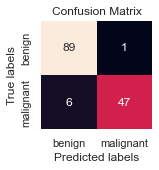

In [146]:
cm = confusion_matrix(y_test, y_pred_KNN)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cbar=False)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['benign', 'malignant'])
ax.yaxis.set_ticklabels(['benign', 'malignant'])

Both models were trained and tested using the same dataset that has undergone feature scaling. The **SVM model** using a linear kernel outperformed the **KNN model** in accuracy and F1 score. Although the KNN model has impressive precision, its recall is significantly less than that of the SVM model. Low recall or high *false negatives* means that the KNN model is having trouble predicting the positive (malignant) cases and instead, it is classifying some positive cases as negative (false negatives). This is problematic in the medical application because it means that a considerable number of patients with malignant breast masses will go undetected, and therefore, untreated.